<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Feature_Engineering/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

# Temizlenmiş veri setini yükleme
veri_yolu = '/content/drive/MyDrive/ev-enerji-tahmini/temizlenmis_veri.csv'
df = pd.read_csv(veri_yolu, index_col=0, parse_dates=True)

# İlk 5 gözlemi gösterme
print("İlk 5 gözlem:")
display(df.head())

# Veri setinin genel bilgisi
print("\n Veri seti boyutu:", df.shape)
print("\n Veri tipleri ve eksik değer durumu:")
display(df.info())
display(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
İlk 5 gözlem:


,Enerji_Tuketimi,Aydinlatma_Tuketimi,Sicaklik_Mutfak,Nem_Mutfak,Sicaklik_Salon,Nem_Salon,Sicaklik_CamasirOdasi,Nem_CamasirOdasi,Sicaklik_Ofis,Nem_Ofis,...,Gorus_Mesafesi,CiyNoktasi_Sicakligi,Rastgele_Degisken_1,Rastgele_Degisken_2,Yil,Ay,Mevsim,HaftaGunu,HaftaGunu_Adi,Ay_Adi
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,63.000000,5.3,13.275433,13.275433,2016,1,Kis,0,Pzt,Ocak
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,59.166667,5.2,18.606195,18.606195,2016,1,Kis,0,Pzt,Ocak
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,55.333333,5.1,28.642668,28.642668,2016,1,Kis,0,Pzt,Ocak
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,51.500000,5.0,45.410389,45.410389,2016,1,Kis,0,Pzt,Ocak
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,47.666667,4.9,10.084097,10.084097,2016,1,Kis,0,Pzt,Ocak



 Veri seti boyutu: (19735, 34)

 Veri tipleri ve eksik değer durumu:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Enerji_Tuketimi        19735 non-null  int64  
 1   Aydinlatma_Tuketimi    19735 non-null  int64  
 2   Sicaklik_Mutfak        19735 non-null  float64
 3   Nem_Mutfak             19735 non-null  float64
 4   Sicaklik_Salon         19735 non-null  float64
 5   Nem_Salon              19735 non-null  float64
 6   Sicaklik_CamasirOdasi  19735 non-null  float64
 7   Nem_CamasirOdasi       19735 non-null  float64
 8   Sicaklik_Ofis          19735 non-null  float64
 9   Nem_Ofis               19735 non-null  float64
 10  Sicaklik_Banyo         19735 non-null  float64
 11  Nem_Banyo              19735 non-null  float64
 12  Sicaklik_DisKuzey      19735 non-null  float64
 13  N

None

,0
Enerji_Tuketimi,0
Aydinlatma_Tuketimi,0
Sicaklik_Mutfak,0
Nem_Mutfak,0
Sicaklik_Salon,0
Nem_Salon,0
Sicaklik_CamasirOdasi,0
Nem_CamasirOdasi,0
Sicaklik_Ofis,0
Nem_Ofis,0


In [10]:
# Öznitelik Çıkarma

# İç Ortam Sıcaklıklarının Ortalaması
sicaklik_sutunlari = [col for col in df.columns if 'Sicaklik_' in col and 'Dis' not in col]
nem_sutunlari = [col for col in df.columns if 'Nem_' in col and 'Dis' not in col]

df['Sicaklik_IcOrtalama'] = df[sicaklik_sutunlari].mean(axis=1)
df['Nem_IcOrtalama'] = df[nem_sutunlari].mean(axis=1)

# Saat bilgisi
df['Saat'] = df.index.hour

# Ay içi gün
df['Gun_Ay'] = df.index.day

# Hafta sonu bilgisi (0 = hafta içi, 1 = hafta sonu)
df['HaftaSonuMu'] = df['HaftaGunu'].apply(lambda x: 1 if x in [5, 6] else 0)

# Yeni veri setinin bilgisi
print("Yeni öznitelikler eklendi. Güncel sütun sayısı:", df.shape[1])
display(df[['Sicaklik_IcOrtalama', 'Nem_IcOrtalama', 'Saat', 'Gun_Ay', 'HaftaSonuMu']].head())


Yeni öznitelikler eklendi. Güncel sütun sayısı: 39


,Sicaklik_IcOrtalama,Nem_IcOrtalama,Saat,Gun_Ay,HaftaSonuMu
date,,,,,
2016-01-11 17:00:00,18.435000,46.742500,17,11,0
2016-01-11 17:10:00,18.439167,46.672708,17,11,0
2016-01-11 17:20:00,18.421667,46.562917,17,11,0
2016-01-11 17:30:00,18.396250,46.468750,17,11,0
2016-01-11 17:40:00,18.408750,46.462917,17,11,0


In [19]:
# Doğru isimlerle güncellenmiş liste
sicaklik_sutunlari = [
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi', 'Sicaklik_Ofis',
    'Sicaklik_Banyo', 'Sicaklik_UtuOdasi',
    'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi'
]

nem_sutunlari = [
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi', 'Nem_Ofis',
    'Nem_Banyo',  'Nem_UtuOdasi',
    'Nem_GencOdasi', 'Nem_EbeveynOdasi'
]

# Kaldır
df.drop(columns=sicaklik_sutunlari + nem_sutunlari, inplace=True)

# Kontrol
print(" Güncel sütun sayısı:", df.shape[1])



 Güncel sütun sayısı: 18


In [20]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/temizlenmis_veri.csv', index_col='date', parse_dates=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train seti boyutu: (13813, 34)
Train zaman aralığı: 2016-01-11 17:00:00 → 2016-05-19 17:20:00

Validation seti boyutu: (2958, 34)
Validation zaman aralığı: 2016-01-25 21:50:00 → 2016-05-23 17:30:00

Test seti boyutu: (2964, 34)
Test zaman aralığı: 2016-01-28 22:50:00 → 2016-05-27 18:00:00


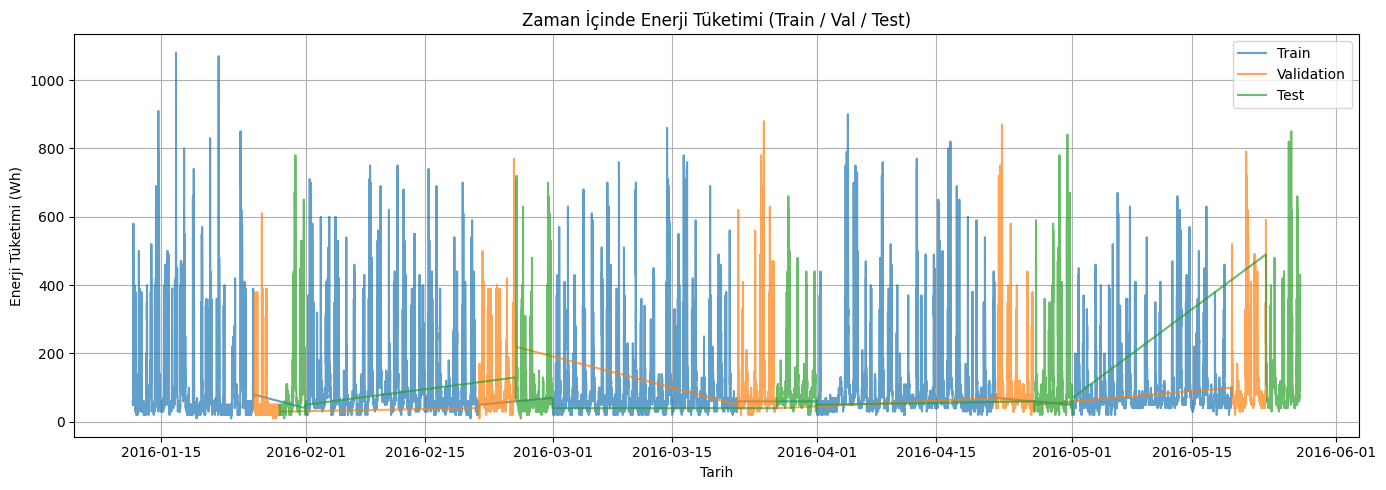

In [25]:
train_parts, val_parts, test_parts = [], [], []

for (yil, ay), grup in df.groupby([df.index.year, df.index.month]):
    grup = grup.sort_index()
    toplam = len(grup)

    train_end = int(toplam * 0.7)
    val_end = train_end + int(toplam * 0.15)

    train_parts.append(grup.iloc[:train_end])
    val_parts.append(grup.iloc[train_end:val_end])
    test_parts.append(grup.iloc[val_end:])

df_train = pd.concat(train_parts)
df_val = pd.concat(val_parts)
df_test = pd.concat(test_parts)

# Bölünen setlerin boyutları ve tarih aralıklarını yazdirma
print("Train seti boyutu:", df_train.shape)
print("Train zaman aralığı:", df_train.index.min(), "→", df_train.index.max())

print("\nValidation seti boyutu:", df_val.shape)
print("Validation zaman aralığı:", df_val.index.min(), "→", df_val.index.max())

print("\nTest seti boyutu:", df_test.shape)
print("Test zaman aralığı:", df_test.index.min(), "→", df_test.index.max())

# Grafik çizimi
plt.figure(figsize=(14, 5))
plt.plot(df_train.index, df_train['Enerji_Tuketimi'], label='Train', alpha=0.7)
plt.plot(df_val.index, df_val['Enerji_Tuketimi'], label='Validation', alpha=0.7)
plt.plot(df_test.index, df_test['Enerji_Tuketimi'], label='Test', alpha=0.7)

plt.title("Zaman İçinde Enerji Tüketimi (Train / Val / Test)")
plt.ylabel("Enerji Tüketimi (Wh)")
plt.xlabel("Tarih")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [26]:
# Tüm sütun adlarını listeleme
print("Toplam sütun sayısı:", len(df.columns))
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}. {col}")


Toplam sütun sayısı: 34
01. Enerji_Tuketimi
02. Aydinlatma_Tuketimi
03. Sicaklik_Mutfak
04. Nem_Mutfak
05. Sicaklik_Salon
06. Nem_Salon
07. Sicaklik_CamasirOdasi
08. Nem_CamasirOdasi
09. Sicaklik_Ofis
10. Nem_Ofis
11. Sicaklik_Banyo
12. Nem_Banyo
13. Sicaklik_DisKuzey
14. Nem_DisKuzey
15. Sicaklik_UtuOdasi
16. Nem_UtuOdasi
17. Sicaklik_GencOdasi
18. Nem_GencOdasi
19. Sicaklik_EbeveynOdasi
20. Nem_EbeveynOdasi
21. Sicaklik_DisHava
22. Basinc
23. Nem_DisHava
24. Ruzgar_Hizi
25. Gorus_Mesafesi
26. CiyNoktasi_Sicakligi
27. Rastgele_Degisken_1
28. Rastgele_Degisken_2
29. Yil
30. Ay
31. Mevsim
32. HaftaGunu
33. HaftaGunu_Adi
34. Ay_Adi


In [27]:
# İç sıcaklık ve nem sütunları
sicaklik_sutunlari = [
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi', 'Sicaklik_Ofis',
    'Sicaklik_Banyo', 'Sicaklik_UtuOdasi', 'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi'
]

nem_sutunlari = [
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi', 'Nem_Ofis',
    'Nem_Banyo', 'Nem_UtuOdasi', 'Nem_GencOdasi', 'Nem_EbeveynOdasi'
]

# Kaldırılacak sütunlar
df.drop(columns=sicaklik_sutunlari + nem_sutunlari, inplace=True)

# Güncel sütun sayısı ve adlari
print("Güncel sütun sayısı:", len(df.columns))
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}. {col}")


Güncel sütun sayısı: 18
01. Enerji_Tuketimi
02. Aydinlatma_Tuketimi
03. Sicaklik_DisKuzey
04. Nem_DisKuzey
05. Sicaklik_DisHava
06. Basinc
07. Nem_DisHava
08. Ruzgar_Hizi
09. Gorus_Mesafesi
10. CiyNoktasi_Sicakligi
11. Rastgele_Degisken_1
12. Rastgele_Degisken_2
13. Yil
14. Ay
15. Mevsim
16. HaftaGunu
17. HaftaGunu_Adi
18. Ay_Adi


In [32]:
# İç sıcaklık sütunları ortalaması
df['Sicaklik_IcOrtalama'] = df[[
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi',
    'Sicaklik_Ofis', 'Sicaklik_Banyo', 'Sicaklik_UtuOdasi',
    'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi'
]].mean(axis=1)

# İç nem sütunları ortalaması
df['Nem_IcOrtalama'] = df[[
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi',
    'Nem_Ofis', 'Nem_Banyo', 'Nem_UtuOdasi',
    'Nem_GencOdasi', 'Nem_EbeveynOdasi'
]].mean(axis=1)


Train seti boyutu: (13813, 36)
Train zaman aralığı: 2016-01-11 17:00:00 → 2016-05-19 17:20:00

Validation seti boyutu: (2958, 36)
Validation zaman aralığı: 2016-01-25 21:50:00 → 2016-05-23 17:30:00

Test seti boyutu: (2964, 36)
Test zaman aralığı: 2016-01-28 22:50:00 → 2016-05-27 18:00:00


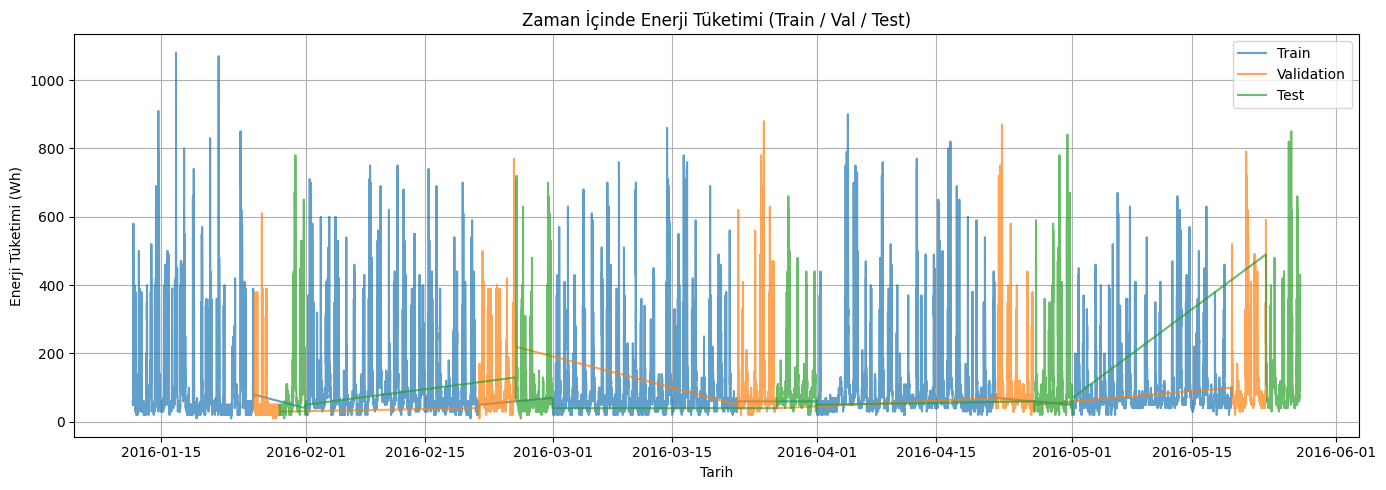

In [33]:
#yeni veri setini bölme
train_parts, val_parts, test_parts = [], [], []

for (yil, ay), grup in df.groupby([df.index.year, df.index.month]):
    grup = grup.sort_index()
    toplam = len(grup)

    train_end = int(toplam * 0.7)
    val_end = train_end + int(toplam * 0.15)

    train_parts.append(grup.iloc[:train_end])
    val_parts.append(grup.iloc[train_end:val_end])
    test_parts.append(grup.iloc[val_end:])

df_train = pd.concat(train_parts)
df_val = pd.concat(val_parts)
df_test = pd.concat(test_parts)

# Bölünen setlerin boyutları ve tarih aralıklarını yazdirma
print("Train seti boyutu:", df_train.shape)
print("Train zaman aralığı:", df_train.index.min(), "→", df_train.index.max())

print("\nValidation seti boyutu:", df_val.shape)
print("Validation zaman aralığı:", df_val.index.min(), "→", df_val.index.max())

print("\nTest seti boyutu:", df_test.shape)
print("Test zaman aralığı:", df_test.index.min(), "→", df_test.index.max())

# Grafik çizimi
plt.figure(figsize=(14, 5))
plt.plot(df_train.index, df_train['Enerji_Tuketimi'], label='Train', alpha=0.7)
plt.plot(df_val.index, df_val['Enerji_Tuketimi'], label='Validation', alpha=0.7)
plt.plot(df_test.index, df_test['Enerji_Tuketimi'], label='Test', alpha=0.7)

plt.title("Zaman İçinde Enerji Tüketimi (Train / Val / Test)")
plt.ylabel("Enerji Tüketimi (Wh)")
plt.xlabel("Tarih")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veriyi okuma
df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/temizlenmis_veri.csv', index_col='date', parse_dates=True)

# Feature engineering
df['Sicaklik_IcOrtalama'] = df[[
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi',
    'Sicaklik_Ofis', 'Sicaklik_Banyo', 'Sicaklik_UtuOdasi',
    'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi'
]].mean(axis=1)

df['Nem_IcOrtalama'] = df[[
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi',
    'Nem_Ofis', 'Nem_Banyo', 'Nem_UtuOdasi',
    'Nem_GencOdasi', 'Nem_EbeveynOdasi'
]].mean(axis=1)

df['Saat'] = df.index.hour
df['Gun_Ay'] = df.index.day
df['HaftaSonuMu'] = df.index.dayofweek.isin([5, 6]).astype(int)

# 3. Gereksiz sütunlarını çıkarma
df.drop(columns=[
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi', 'Sicaklik_Ofis',
    'Sicaklik_Banyo', 'Sicaklik_UtuOdasi', 'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi',
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi', 'Nem_Ofis',
    'Nem_Banyo', 'Nem_UtuOdasi', 'Nem_GencOdasi', 'Nem_EbeveynOdasi'
], inplace=True)

# Zaman temelli bölme
train_parts, val_parts, test_parts = [], [], []
for (yil, ay), grup in df.groupby([df.index.year, df.index.month]):
    grup = grup.sort_index()
    n = len(grup)
    train_parts.append(grup.iloc[:int(n*0.7)])
    val_parts.append(grup.iloc[int(n*0.7):int(n*0.85)])
    test_parts.append(grup.iloc[int(n*0.85):])

df_train = pd.concat(train_parts)
df_val = pd.concat(val_parts)
df_test = pd.concat(test_parts)

# Ölçeklenecek sütunlar
ozellikler = [
    'Sicaklik_IcOrtalama', 'Nem_IcOrtalama',
    'Sicaklik_DisKuzey', 'Nem_DisKuzey',
    'Sicaklik_DisHava', 'Basinc', 'Nem_DisHava',
    'Ruzgar_Hizi', 'Gorus_Mesafesi', 'CiyNoktasi_Sicakligi',
    'Rastgele_Degisken_1', 'Rastgele_Degisken_2',
    'Saat', 'Gun_Ay', 'HaftaSonuMu'
]


# StandardScaler ile ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train[ozellikler])
X_val_scaled = scaler.transform(df_val[ozellikler])
X_test_scaled = scaler.transform(df_test[ozellikler])

# 7. Hedef değişkenler
y_train = df_train['Enerji_Tuketimi']
y_val = df_val['Enerji_Tuketimi']
y_test = df_test['Enerji_Tuketimi']

print("Tüm adımlar tamamlandı")
print("X_train_scaled:", X_train_scaled.shape)


Tüm adımlar tamamlandı
X_train_scaled: (13813, 15)


In [36]:
print(df.columns.tolist())


['Enerji_Tuketimi', 'Aydinlatma_Tuketimi', 'Sicaklik_DisKuzey', 'Nem_DisKuzey', 'Sicaklik_DisHava', 'Basinc', 'Nem_DisHava', 'Ruzgar_Hizi', 'Gorus_Mesafesi', 'CiyNoktasi_Sicakligi', 'Rastgele_Degisken_1', 'Rastgele_Degisken_2', 'Yil', 'Ay', 'Mevsim', 'HaftaGunu', 'HaftaGunu_Adi', 'Ay_Adi', 'Sicaklik_IcOrtalama', 'Nem_IcOrtalama', 'Saat', 'Gun_Ay', 'HaftaSonuMu']


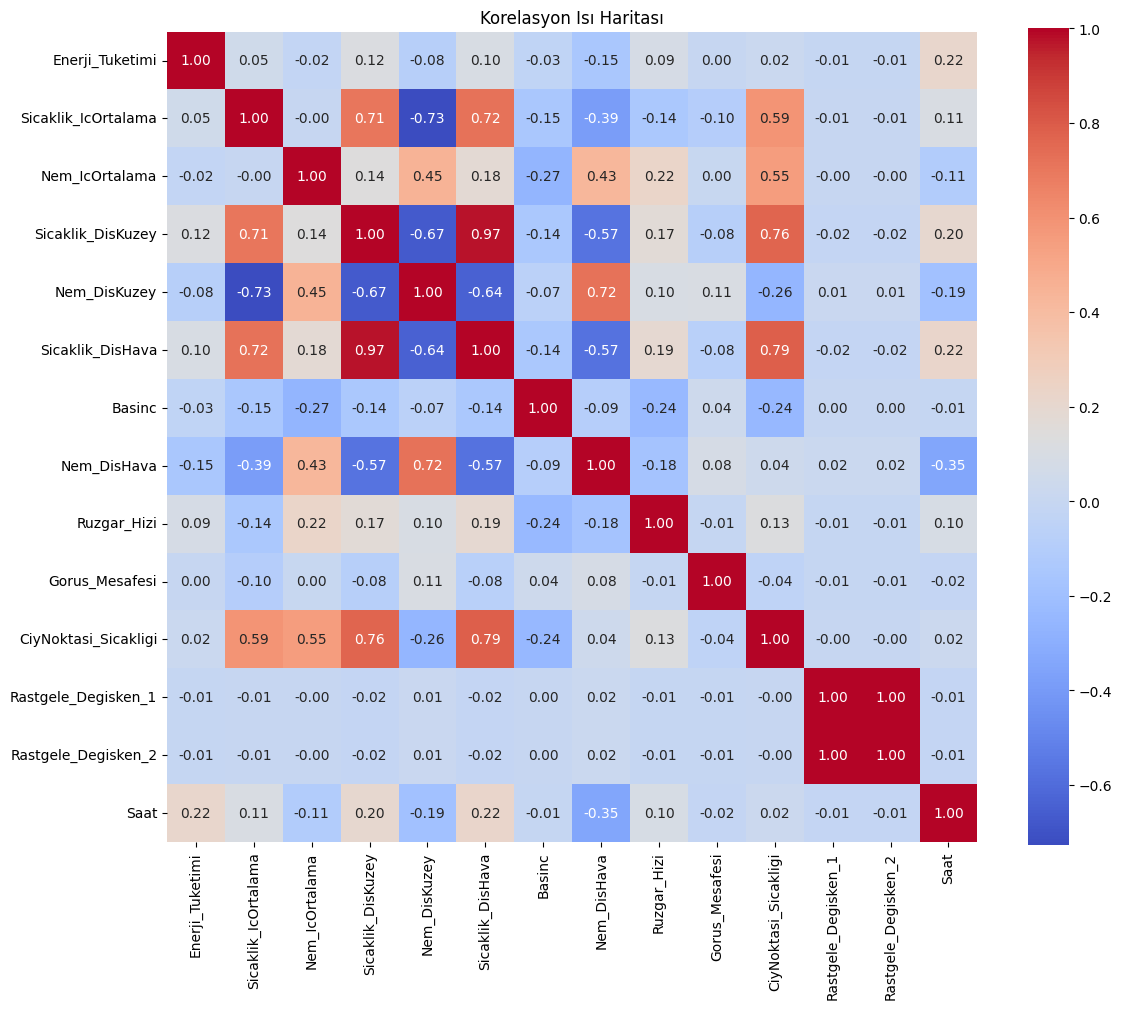

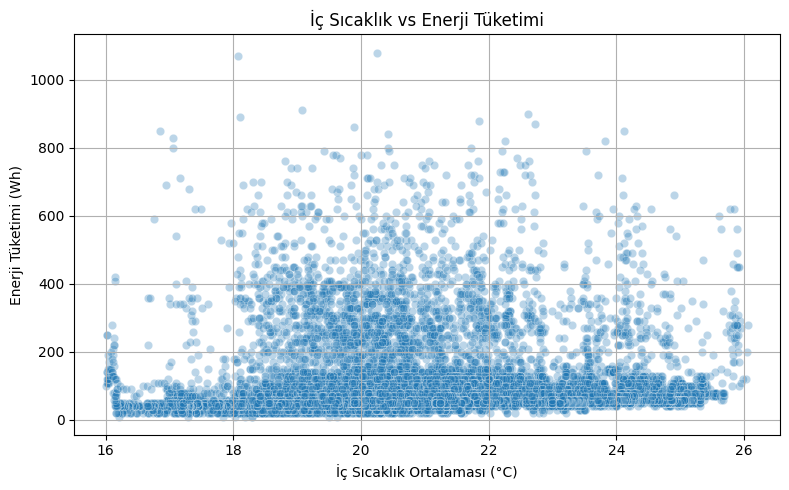

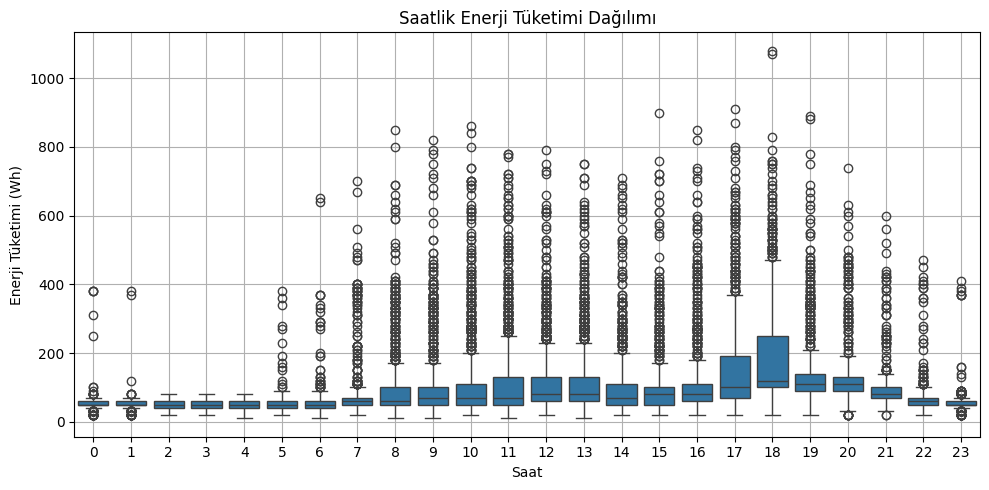

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Doğru yolu kullanarak veri setini oku
df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/temizlenmis_veri.csv', index_col='date', parse_dates=True)

# Ortalama iç sıcaklık ve nem sütunları
df['Sicaklik_IcOrtalama'] = df[[
    'Sicaklik_Mutfak', 'Sicaklik_Salon', 'Sicaklik_CamasirOdasi',
    'Sicaklik_Ofis', 'Sicaklik_Banyo', 'Sicaklik_UtuOdasi',
    'Sicaklik_GencOdasi', 'Sicaklik_EbeveynOdasi'
]].mean(axis=1)

df['Nem_IcOrtalama'] = df[[
    'Nem_Mutfak', 'Nem_Salon', 'Nem_CamasirOdasi',
    'Nem_Ofis', 'Nem_Banyo', 'Nem_UtuOdasi',
    'Nem_GencOdasi', 'Nem_EbeveynOdasi'
]].mean(axis=1)

df['Saat'] = df.index.hour

# Korelasyon Isı Haritası
plt.figure(figsize=(12, 10))
corr = df[[
    'Enerji_Tuketimi', 'Sicaklik_IcOrtalama', 'Nem_IcOrtalama',
    'Sicaklik_DisKuzey', 'Nem_DisKuzey', 'Sicaklik_DisHava', 'Basinc',
    'Nem_DisHava', 'Ruzgar_Hizi', 'Gorus_Mesafesi', 'CiyNoktasi_Sicakligi',
    'Rastgele_Degisken_1', 'Rastgele_Degisken_2', 'Saat'
]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Korelasyon Isı Haritası")
plt.tight_layout()
plt.show()

# İç Sıcaklık – Enerji Tüketimi Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sicaklik_IcOrtalama'], y=df['Enerji_Tuketimi'], alpha=0.3)
plt.title("İç Sıcaklık vs Enerji Tüketimi")
plt.xlabel("İç Sıcaklık Ortalaması (°C)")
plt.ylabel("Enerji Tüketimi (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Saatlik Enerji Tüketimi Dağılımı (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Saat', y='Enerji_Tuketimi', data=df)
plt.title("Saatlik Enerji Tüketimi Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Enerji Tüketimi (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
ozellikler.append('HaftaSonuMu')
ozellikler.append('Gun_Ay')


In [47]:
df['Gun_Ay'] = df.index.day


In [48]:
df['HaftaSonuMu'] = df.index.dayofweek.isin([5, 6]).astype(int)


In [50]:
df['Gun_Ay'] = df.index.day
df['HaftaSonuMu'] = df.index.dayofweek.isin([5, 6]).astype(int)


In [51]:
X_train_scaled = scaler.fit_transform(df_train[ozellikler])
X_val_scaled = scaler.transform(df_val[ozellikler])
X_test_scaled = scaler.transform(df_test[ozellikler])


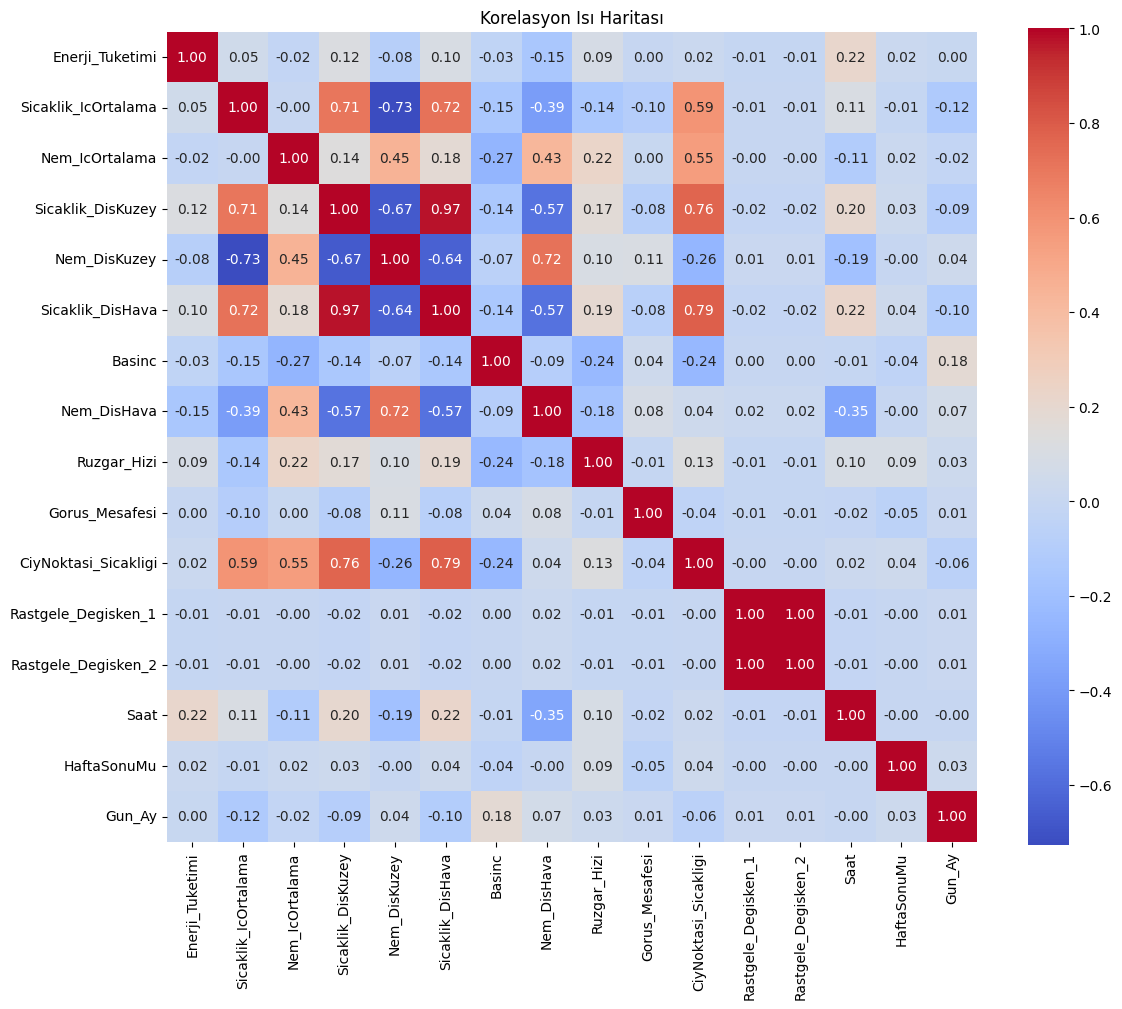

In [52]:
# Korelasyon Isı Haritası
plt.figure(figsize=(12, 10))
corr = df[[
    'Enerji_Tuketimi', 'Sicaklik_IcOrtalama', 'Nem_IcOrtalama',
    'Sicaklik_DisKuzey', 'Nem_DisKuzey', 'Sicaklik_DisHava', 'Basinc',
    'Nem_DisHava', 'Ruzgar_Hizi', 'Gorus_Mesafesi', 'CiyNoktasi_Sicakligi',
    'Rastgele_Degisken_1', 'Rastgele_Degisken_2', 'Saat', 'HaftaSonuMu', 'Gun_Ay'
]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Korelasyon Isı Haritası")
plt.tight_layout()
plt.show()